# Job Market Skill Requirements Analysis

<img src="https://raw.githubusercontent.com/AshishJangra27/Jobs-Analysis-based-on-Skills/refs/heads/main/poster.png" width="100%">


## Objectives

- Identify **common skills** across all jobs.
- Highlight **key skills for Data Analyst** roles.
- Extract **important skills for HDFC Bank** jobs.
- Analyze **years of experience vs skill requirements**.

## Dataset Columns

- `job_role`, `company`, `experience`, `salary`, `location`,  
  `rating`, `reviews`, `resposibilities`.

## Approach

1. **Clean Data**:
   - Standardize skill names from `resposibilities`.
   - Handle missing or inconsistent values.

2. **Skill Analysis**:
   - Find frequent skills across all roles.
   - Filter and analyze skills for:
     - Data Analyst roles.
     - HDFC Bank listings.

3. **Experience Analysis**:
   - Group jobs by experience range.
   - Compare skill trends across these groups.

---

## Sample Dataset Preview

| job_id       | job_role                                         | company    | experience | salary         | location                                         | rating | reviews         | resposibilities                               |
|--------------|--------------------------------------------------|------------|------------|----------------|--------------------------------------------------|--------|-----------------|-----------------------------------------------|
| 70123010000  | Branch Banking - Calling For Women Candidates    | Hdfc Bank  | 1-6 Yrs    | Not disclosed  | Kolkata, Hyderabad/Secunderabad, Pune, Ahmedabad | 4.0    | 39110 Reviews   | Customer Service, Sales, Relationship Management |
| 60123910000  | Product Owner Senior Manager                     | Accenture  | 11-15 Yrs  | Not disclosed  | Kolkata, Mumbai, Hyderabad, Pune, Chennai       | 4.1    | 32129 Reviews   | Product management, Market analysis, Change management |
| 60123910000  | Employee Relations and Policies Associate Manager| Accenture  | 3-7 Yrs    | Not disclosed  | Kolkata, Mumbai, Hyderabad, Pune, Chennai       | 4.1    | 32129 Reviews   | Business process, Change management, Team management |
| 60123910000  | Employee Relations and Policies Specialist       | Accenture  | 3-7 Yrs    | Not disclosed  | Kolkata, Mumbai, Hyderabad, Pune, Chennai       | 4.1    | 32129 Reviews   | Business process, Change management, Team management |
| 60123010000  | SAP BO Consultant                                | Mindtree   | 5-7 Yrs    | Not disclosed  | Hybrid - Kolkata, Hyderabad, Pune, Bangalore    | 4.1    | 3759 Reviews    | SAP BO, PL / SQL, Oracle SQL, SAP Business Objects |



### 1. Data Exploration

In [ ]:
import pandas as pd
df = pd.read_csv('jobs.csv')

df.head()

#### 1.1 Checking & Removing Null Values

Removing rows with missing values in key columns: `job_id`, `experience`, `resposibilities`, and `company`.


In [3]:
df = df.dropna(subset = ['job_id','experience','resposibilities','company'])

#### 1.2 Remove Un-necessery Columns

In [4]:
df = df.drop(columns=['company_link','job_link','rating','reviews','posted_on','location'])

#### 1.3 Checking Duplicate Values

In [5]:
df = df.drop_duplicates(subset = 'job_id')

### 2. Data Cleaning

#### 2.1 Typecast job_id

In [6]:
df['job_id'] = df['job_id'].astype('int')

<ipython-input-6-d045448d20f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_id'] = df['job_id'].astype('int')


#### 2.2 Clean Experince Column

**Extracting Experience Range**  
Splitting the `experience` column to create `min_exp` and `max_exp` for easier analysis.


In [7]:
df['min_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[0].astype('int')
df['max_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[1].astype('int')

df.head()

<ipython-input-7-4a2a8305517f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_exp'] = df['experience'].str.replace(' Yrs','').str.strip().str.split('-').str[0].astype('int')


,job_id,job_role,company,experience,salary,resposibilities,min_exp,max_exp
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Customer Service,Sales,Relationship Management",1,6
1,60123905908,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Product management,Market analysis,Change mana...",11,15
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
3,60123905897,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Business process,Change management,Team manage...",3,7
4,60123008332,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7


#### 2.3 Clean Salary Column

**Cleaning Salary Data**  
Extracting `min_salary` and `max_salary` from the `salary` column, handling special cases, and removing irrelevant salary entries for accurate analysis.


In [8]:
df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[0].str.strip()
df = df[(df['clean_salary'] != '9.5 Cr and above') & (df['clean_salary'] != 'Less than 5000') &  (df['clean_salary'] != 'Less than 50000')]
df['min_salary'] = df['clean_salary'].str.split('(').str[0].str.strip()
del df['clean_salary']


df['clean_salary'] = df['salary'].str.replace(' PA.','').str.replace(',','').str.split('-').str[1].str.split('(').str[0].str.strip()
df = df[df['clean_salary'] != '9.5 Cr and above']
df['max_salary'] = df['clean_salary'].fillna('Not disclosed')
del df['clean_salary']

del df['salary']
del df['experience']

<ipython-input-8-f820c29202fb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_salary'] = df['clean_salary'].fillna('Not disclosed')


### 3 Data Analysis

#### 3.1) What are the skills that are needed for almost all the jobs

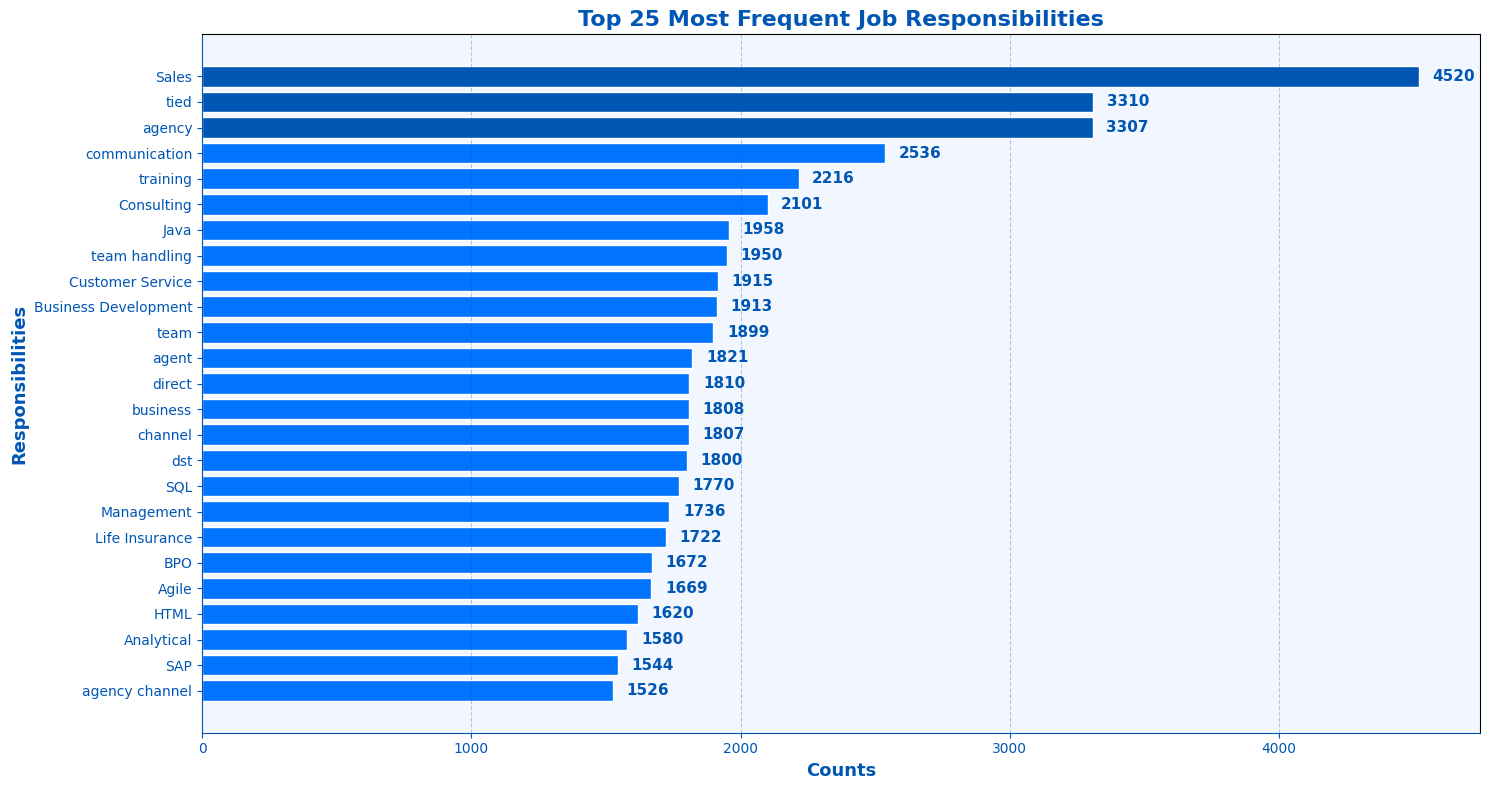

In [81]:
# Data (Top 25 Responsibilities)
skill_counts = df['resposibilities'].str.split(',').explode().value_counts().head(25)

# Define Naukri color theme
naukri_blue = '#0073FF'
naukri_blue_dark = '#0056b3'  # Darker blue for top 3 bars
naukri_light = '#F2F7FF'      # Lighter background

# Plot
plt.style.use('default')
plt.figure(figsize=(15,8))

# Color mapping: top 3 in dark blue, rest in light blue
colors = [naukri_blue_dark if i < 3 else naukri_blue for i in range(len(skill_counts))]

bars = plt.barh(skill_counts.index, skill_counts.values, color=colors, edgecolor='white')

# Add value annotations (bold & larger)
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=11, fontweight='bold', color=naukri_blue_dark)

# Titles and labels with theme colors
plt.title('Top 25 Most Frequent Job Responsibilities', fontsize=16, fontweight='bold', color=naukri_blue_dark)
plt.xlabel('Counts', fontsize=13, fontweight='bold', color=naukri_blue_dark)
plt.ylabel('Responsibilities', fontsize=13, fontweight='bold', color=naukri_blue_dark)

# Axis styling
plt.gca().spines['bottom'].set_color(naukri_blue_dark)
plt.gca().spines['left'].set_color(naukri_blue_dark)
plt.gca().tick_params(axis='x', colors=naukri_blue_dark)
plt.gca().tick_params(axis='y', colors=naukri_blue_dark)
plt.gca().invert_yaxis()

# Background
plt.gca().set_facecolor(naukri_light)
plt.grid(axis='x', linestyle='--', alpha=0.3, color=naukri_blue_dark)

plt.tight_layout()
plt.show()


## 🔍 Key Insights from Top 25 Job Responsibilities

- **Sales**, **tied**, and **agency** are the **most frequently mentioned responsibilities**, indicating a strong demand for roles in **business development** and **client acquisition** across various sectors.
  
- **Communication**, **training**, and **consulting** also rank high, highlighting the importance of **soft skills** and **client-facing roles** in the current job market.

- **Technical skills** such as **Java** and **SQL** appear among the top 25, suggesting that **tech-driven roles** remain significant, though **soft skills** dominate the overall landscape.

- Other recurring themes include **team handling**, **customer service**, and **business development**, reflecting the growing need for **leadership** and **people management capabilities**.

---

This analysis provides a **holistic view of in-demand skills**, showcasing a blend of **sales-oriented**, **technical**, and **interpersonal** competencies crucial for employability.


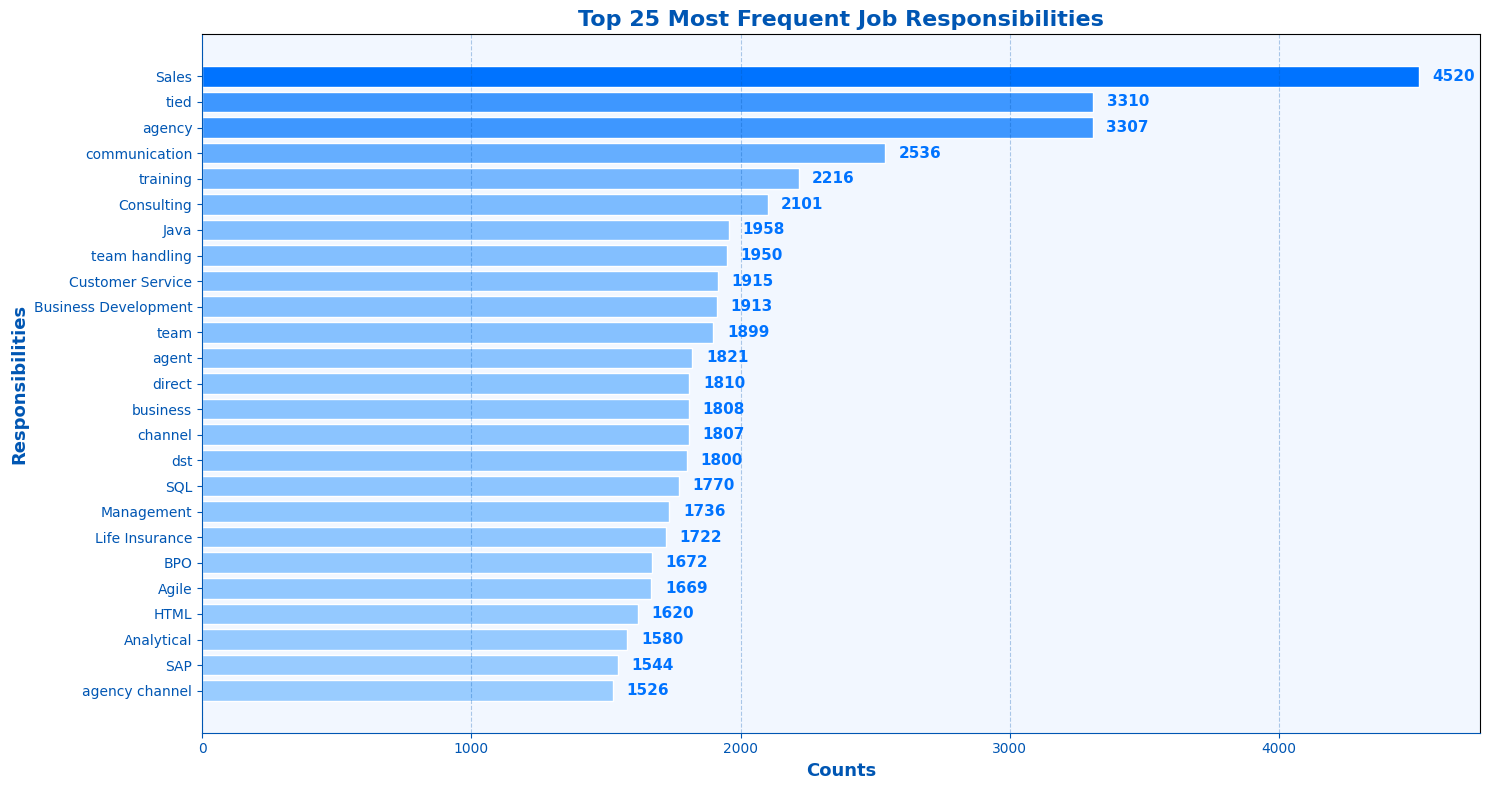

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Data (Top 25 Responsibilities)
skill_counts = df['resposibilities'].str.split(',').explode().value_counts().head(25)

# Define color gradient: from dark to light blue
naukri_blue_dark = np.array([0, 115, 255]) / 255    # #0073FF
naukri_blue_light = np.array([153, 204, 255]) / 255

# Normalize counts to create gradient steps
norm = (skill_counts.values - skill_counts.values.min()) / (skill_counts.values.max() - skill_counts.values.min())
colors = [naukri_blue_light + (naukri_blue_dark - naukri_blue_light) * n for n in norm]

# Plot
plt.style.use('default')
plt.figure(figsize=(15,8))

bars = plt.barh(skill_counts.index, skill_counts.values, color=colors, edgecolor='white')

# Add value annotations
for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=11, fontweight='bold', color=naukri_blue_dark)

# Titles and labels
plt.title('Top 25 Most Frequent Job Responsibilities', fontsize=16, fontweight='bold', color='#0056b3')
plt.xlabel('Counts', fontsize=13, fontweight='bold', color='#0056b3')
plt.ylabel('Responsibilities', fontsize=13, fontweight='bold', color='#0056b3')

# Axis styling
plt.gca().spines['bottom'].set_color('#0056b3')
plt.gca().spines['left'].set_color('#0056b3')
plt.gca().tick_params(axis='x', colors='#0056b3')
plt.gca().tick_params(axis='y', colors='#0056b3')
plt.gca().invert_yaxis()

# Background
plt.gca().set_facecolor('#F2F7FF')
plt.grid(axis='x', linestyle='--', alpha=0.3, color='#0056b3')

plt.tight_layout()
plt.show()


#### 3.2) What are the most important skills for a Data Analyst


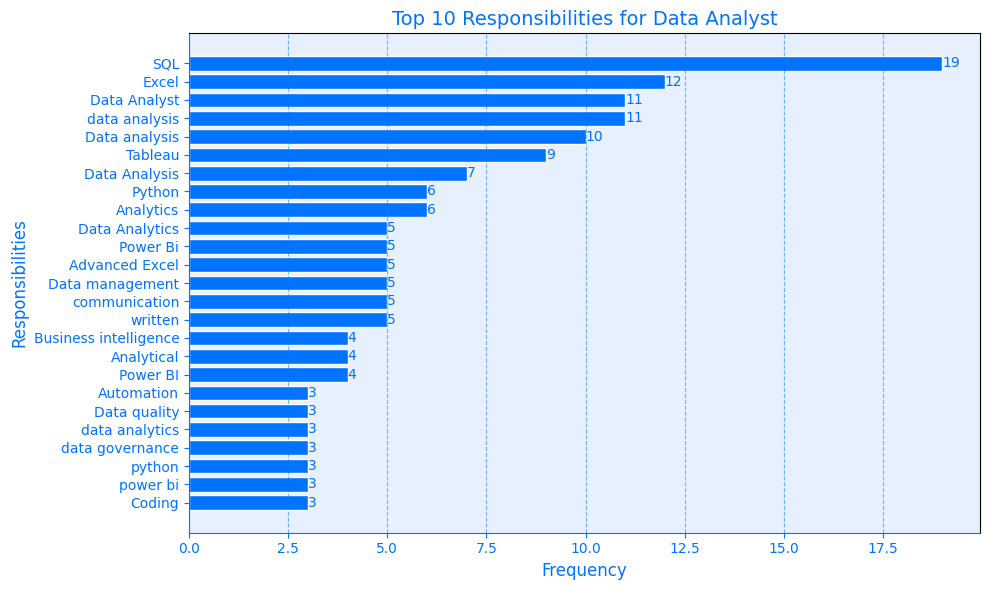

In [80]:
# Extract top 10 skills for Data Analyst
analyst_skills = df[df['job_role'] == 'Data Analyst']['resposibilities'].str.split(',').explode().value_counts().head(25)

# Define Naukri color theme
naukri_blue = '#0073FF'
naukri_light = '#E6F0FF'

# Plot
plt.style.use('default')
plt.figure(figsize=(10,6))
bars = plt.barh(analyst_skills.index, analyst_skills.values, color=naukri_blue, edgecolor='white')

# Add value annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=10, color=naukri_blue)

# Titles and labels with theme colors
plt.title('Top 10 Responsibilities for Data Analyst', fontsize=14, color=naukri_blue)
plt.xlabel('Frequency', fontsize=12, color=naukri_blue)
plt.ylabel('Responsibilities', fontsize=12, color=naukri_blue)

# Axis styling
plt.gca().spines['bottom'].set_color(naukri_blue)
plt.gca().spines['left'].set_color(naukri_blue)
plt.gca().tick_params(axis='x', colors=naukri_blue)
plt.gca().tick_params(axis='y', colors=naukri_blue)
plt.gca().invert_yaxis()

# Background
plt.gca().set_facecolor(naukri_light)
plt.grid(axis='x', linestyle='--', alpha=0.5, color=naukri_blue)

plt.tight_layout()
plt.show()


#### 3.3) What are the most important skills to ge thired in HDFC Bank

<Axes: xlabel='resposibilities'>

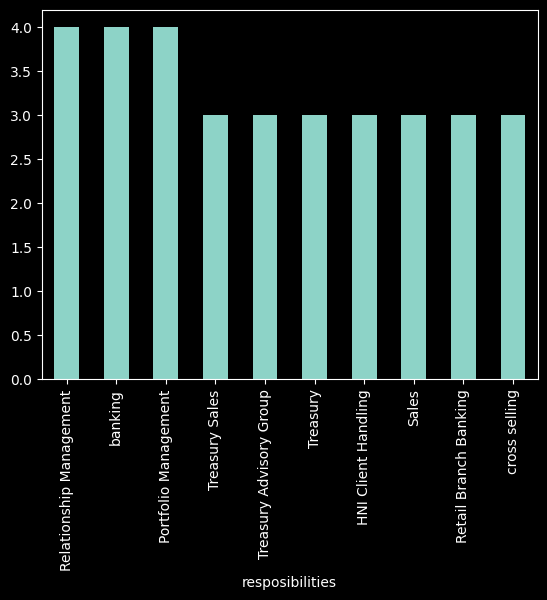

In [20]:
df[df['company'] == 'Hdfc Bank']['resposibilities'].str.split(',').explode().value_counts().head(10).plot(kind = 'bar')

#### 3.4 Years of Exp vs Requirements

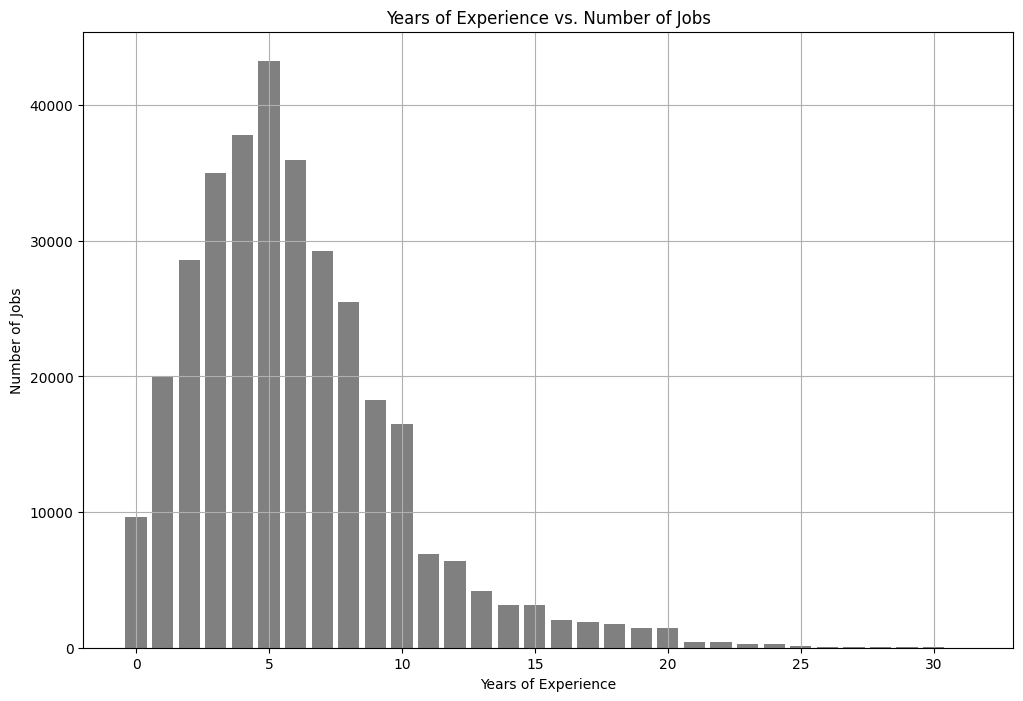

In [70]:
experience = []
job_counts = []

for exp in range(0,32):
  experience.append(exp)
  job_counts.append(len(df[(df['max_exp'] >= exp) & (df['min_exp'] <= exp)]))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.style.use('default')
plt.grid(True)
plt.bar(experience, job_counts, color='gray')
plt.xlabel("Years of Experience")
plt.ylabel("Number of Jobs")
plt.title("Years of Experience vs. Number of Jobs")

plt.show()

## 📊 Years of Experience vs. Number of Jobs

- The **highest demand** in the job market is for candidates with **4-6 years of experience**, peaking at **5 years**.

- Jobs requiring **0-3 years** of experience also show **strong demand**, indicating good opportunities for **early-career professionals**.

- After **6 years**, the **number of job opportunities gradually decreases**, suggesting that mid-level positions dominate the market, while **senior roles (10+ years)** become progressively **fewer**.

- **Niche or leadership positions** for candidates with **15+ years** of experience exist but are **significantly limited**.

---

### 🔑 **Conclusion**:
The job market is primarily **centered around mid-level experience**, with **early-career roles** also in demand. Professionals should focus on **skill development** within the **4-6 year window** to leverage maximum job opportunities.


In [23]:
df.head()

,job_id,job_role,company,resposibilities,min_exp,max_exp,min_salary,max_salary
0,70123006070,Branch Banking - Calling For Women Candidates,Hdfc Bank,"Customer Service,Sales,Relationship Management",1,6,Not disclosed,Not disclosed
1,60123905908,Product Owner Senior Manager,Accenture,"Product management,Market analysis,Change mana...",11,15,Not disclosed,Not disclosed
2,60123905898,Employee Relations and Policies Associate Manager,Accenture,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
3,60123905897,Employee Relations and Policies Specialist,Accenture,"Business process,Change management,Team manage...",3,7,Not disclosed,Not disclosed
4,60123008332,SAP BO Consultant,Mindtree,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",5,7,Not disclosed,Not disclosed


#### 3.5) Average Salary by HDFC Bank

In [33]:
df_ = df[df['company'] == 'Hdfc Bank']

((df_[df_['min_salary'] != 'Not disclosed']['min_salary'].astype(int) + df_[df_['max_salary'] != 'Not disclosed']['max_salary'].astype(int))/2).mean()

np.float64(693750.0)

#### 3.6) Average Salary by Every Company

<ipython-input-59-71780553b743>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['min_salary'] = df_['min_salary'].astype(int)


<Axes: xlabel='company'>

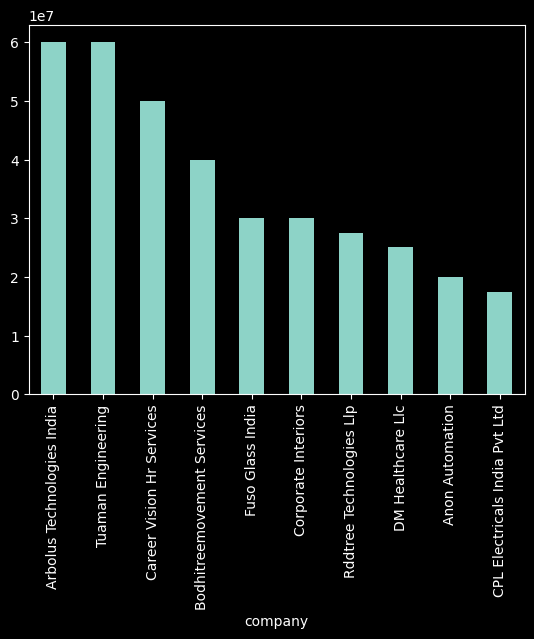

In [59]:
df_ = df[df['min_salary'] != 'Not disclosed']
df_['min_salary'] = df_['min_salary'].astype(int)
df_.groupby('company')['min_salary'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

<ipython-input-60-9980d1fe36c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['max_salary'] = df_['max_salary'].astype(int)


<Axes: xlabel='company'>

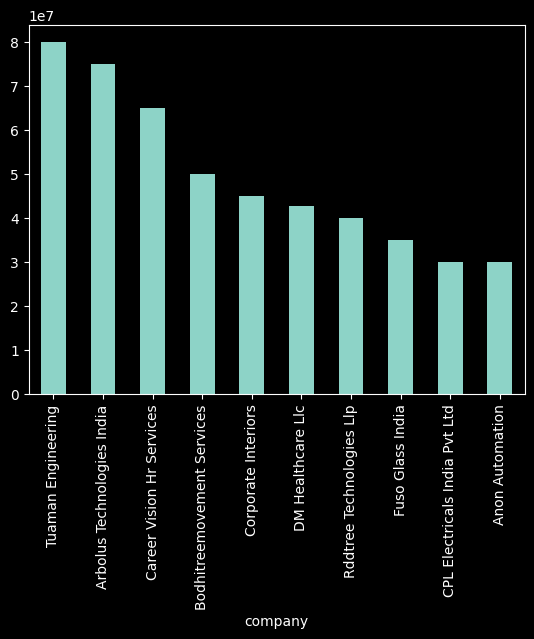

In [60]:
df_ = df[df['max_salary'] != 'Not disclosed']
df_['max_salary'] = df_['max_salary'].astype(int)
df_.groupby('company')['max_salary'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')

In [63]:
df.to_csv('clean_jobs.csv')